# Kernel ridge regression for a saturating nonlinearity

We feed a speech signal to a speaker with some nonlinear gain and try to estimate the nonlinearity by performing a regularised Kernel regression with a Gaussian Kernel.
We try the above for sigmoid, tanh, hard cutoff nonlinearities.

### We implement the following here:
1. First feed a set of values on the real line to the nonlinearities, find y and add noise.
2. For each of the nonlinearities, find the Kernel, optimise the hyperparamters.
3. Now do the same for a speech signal input as a wav file with normalised amplitudes

## Step 1:

In [279]:
import numpy as np
import matplotlib.pyplot as plt

In [280]:
## PLot the three nonlinarities: Sigmoid, tanh, hard cutoff

def sigmoid(x,width,height):
    return height/(1+np.exp(-x/width))-0.5*height

def tanh(x,width,height):
    return height*np.tanh(x/width)

def hard_cutoff(x, width, height):
    #Note that width is one sided
    return (height/width)*np.clip(x,-width,width)

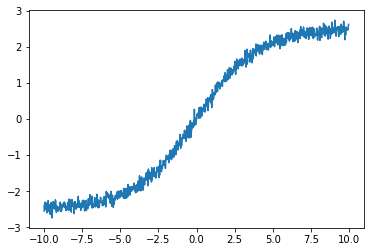

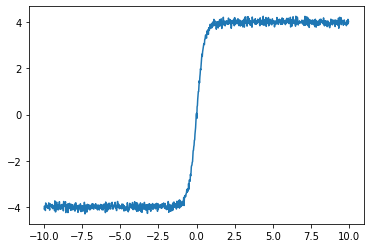

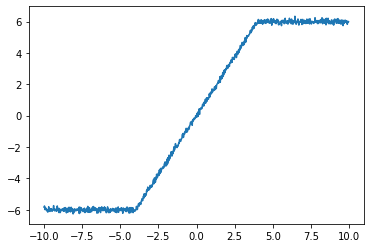

In [205]:
xbeg = -10
xend = 10
n_x = 1000
noise_amp = 0.1

x = np.linspace(xbeg,xend,n_x+1)[:-1]

y1 = sigmoid(x,2,5)+noise_amp*np.random.randn(len(x))
y2 = tanh(x,0.5,4)+noise_amp*np.random.randn(len(x))
y3 = hard_cutoff(x,4,6)+noise_amp*np.random.randn(len(x))

plt.plot(x,y1)
plt.show()
plt.plot(x,y2)
plt.show()
plt.plot(x,y3)
plt.show()

In [206]:
num_training = 100

rand_index = np.random.choice(n_x,num_training,replace=False)
X_train = x[rand_index]
Y1_train = y1[rand_index]
Y2_train = y2[rand_index]
Y3_train = y3[rand_index]

In [281]:
def gauss_kernel_matrix(x,y,sigma):
    
    if (len(np.shape(x))==1):
        K = np.exp(-0.5*((x[None,:]-y[:,None])**2)/(sigma**2))
    else:
        norm = np.linalg.norm(x[None,:,:]-y[:,None,:],axis=2)
        K = np.exp(-0.5*(norm**2)/(sigma**2))
    return K

In [282]:
def Kernel_regression(K,reg_param,Y_train):
    alpha = np.linalg.inv(K+reg_param*np.eye(len(K)))@Y_train
    return alpha

In [254]:
sigma = 0.8
reg_param = 0.01
K_train = gauss_kernel_matrix(X_train,X_train,sigma)

alpha1 = Kernel_regression(K_train,reg_param,Y1_train)
Y1 = np.sum((np.tile(alpha1,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)

alpha2 = Kernel_regression(K_train,reg_param,Y2_train)
Y2 = np.sum((np.tile(alpha2,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)

alpha3 = Kernel_regression(K_train,reg_param,Y3_train)
Y3 = np.sum((np.tile(alpha3,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)

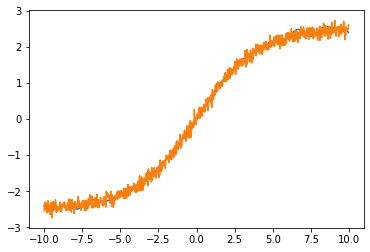

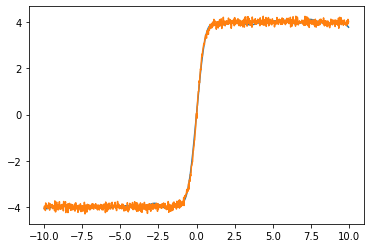

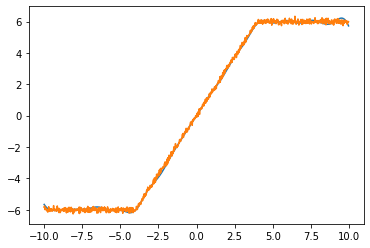

In [255]:
plt.plot(x,Y1)
plt.plot(x,y1)
plt.show()
plt.plot(x,Y2)
plt.plot(x,y2)
plt.show()
plt.plot(x,Y3)
plt.plot(x,y3)
plt.show()

In [195]:
%reset -f

In [284]:
from scipy.io.wavfile import read, write

In [315]:
fs, x = read('test_hello.wav')
max_ = np.max(np.abs(x))
x = (x/max_).astype(np.float32)

y1 = sigmoid(x,0.1,0.1)
y2 = tanh(x,0.15,0.6)
y3 = hard_cutoff(x,0.05,0.2)
write('y1.wav',fs,y1)

In [316]:
num_training = 100
n_x = len(x)

rand_index = np.random.choice(n_x,num_training,replace=False)
X_train = x[rand_index]
Y1_train = y1[rand_index]
Y2_train = y2[rand_index]
Y3_train = y3[rand_index]
del y1,y2,y3
print(len(Y1_train))

100


In [317]:
sigma = 0.5
reg_param = 0.1

K_train = gauss_kernel_matrix(X_train,X_train,sigma)
print(np.shape(K_train))
print(np.shape(Y1_train))

alpha1 = Kernel_regression(K_train,reg_param,Y1_train)
Y1 = gauss_kernel_matrix(X_train,x,sigma)@alpha1
del alpha1
write('Y1_.wav',fs,Y1)
'''
alpha2 = Kernel_regression(K_train,reg_param,Y2_train)
Y2 = np.sum((np.tile(alpha2,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)
del alpha2
write('Y2.wav',fs,Y2)
del Y2



alpha3 = Kernel_regression(K_train,reg_param,Y3_train)
Y3 = np.sum((np.tile(alpha3,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)
del alpha3
write('Y3.wav',fs,Y3)
del Y3
'''

(100, 100)
(100, 2)


"\nalpha2 = Kernel_regression(K_train,reg_param,Y2_train)\nY2 = np.sum((np.tile(alpha2,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)\ndel alpha2\nwrite('Y2.wav',fs,Y2)\ndel Y2\n\n\n\nalpha3 = Kernel_regression(K_train,reg_param,Y3_train)\nY3 = np.sum((np.tile(alpha3,n_x).reshape((n_x,num_training)))*gauss_kernel_matrix(X_train,x,sigma),axis=1)\ndel alpha3\nwrite('Y3.wav',fs,Y3)\ndel Y3\n"

In [296]:
len(Y1)

166521

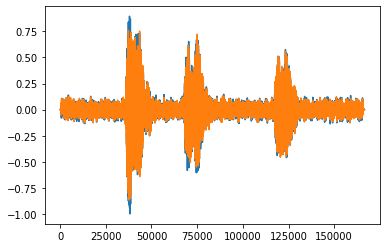

In [299]:
plt.plot(x)

In [278]:
%reset -f